In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# the .txt files which store the data for the online recording of the sample mass
path1 = "C:\Arbeit\MikrowellenTr\Schwindung\\test"

In [4]:
# multiple recordings in the span of one experiment are combined into 1 dataframe
dfs = []
for i in range(3,11):
    path2 = path1+str(i)+".csv"
    dfs.append(pd.read_csv((path2),sep="\t",names=['date', 'time', 'mass']))
dfs1 = pd.concat(dfs,ignore_index=True)

In [5]:
# the data for the sample mass is converted from its original "string" format to "float"
# German numbers are stored with a "comma (,)" as the decimal separator and as "string"
# the following loop converts said readings into float
for i,k in enumerate(dfs1['mass']):
    dfs1['mass'][i] = float(k[0:-3]+'.'+k[-2]+k[-1])

In [6]:
# several readings are erroneous as the recording started before the sample was placed on the scale
# these values are dropped from the dataframe and the index is reset
dfs2 = dfs1.drop(index=dfs1['mass'][dfs1['mass']<1].index)
dfs2 = dfs2.reset_index()
dfs2 = dfs2.drop(columns='index')

In [7]:
len(dfs2)

221057

In [8]:
# the readings are recorded with the corresponding date & time stamps
# these are combined to represent the unique timestamp for each reading
dfs2['datetime'] = dfs2['date']+' '+dfs2['time']

In [9]:
# the original dataframe is too large as the sample mass is recorded many times every second
# in the following section only every unique reading of the sample mass is stored
# the final timestamp for every unique reading will be stored using the maximum index for each unique reading
mass_sorted = sorted(np.unique(dfs2['mass']),reverse=True)
Indices = []
for i,k in enumerate(mass_sorted):
    Indices.append(np.max(dfs2['mass'][dfs2['mass']==k].index))

In [10]:
# the shrunk dataframe with only unique sample mass values and the corresponding timestamp is stored 
dfs3 = dfs2.loc[Indices][['mass','datetime']]
dfs3 = dfs3.reset_index()
dfs3 = dfs3.drop(columns='index')

In [11]:
# the date and time data as string is converted using the datetime function with the correct format
from datetime import datetime

dfs3['datetime_data'] = np.zeros(len(dfs3))
for i,k in enumerate(dfs3['datetime']):
    dfs3['datetime_data'][i] = datetime.strptime(k,'%d.%m.%Y %H:%M:%S')

<ipython-input-11-64ae1c61572b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs3['datetime_data'][i] = datetime.strptime(k,'%d.%m.%Y %H:%M:%S')


In [12]:
# the elapsed time since the beginning of the experiments is stored
dfs3['delta_t']=dfs3['datetime_data']-dfs3['datetime_data'][0]

In [13]:
# the timestamps are dropped from the dataframe as they are irrelevant
dfs3 = dfs3.drop(columns=['datetime','datetime_data'])

In [14]:
# the deltat data is to be converted into a numpy array due to problem with the datetime format
Delta_t = dfs3['delta_t']
Delta_t1 = []
for i,k in enumerate(Delta_t):
    Delta_t1.append(k.days*24*3600+k.seconds)

Text(0.5, 0, 'Sample mass (kg)')

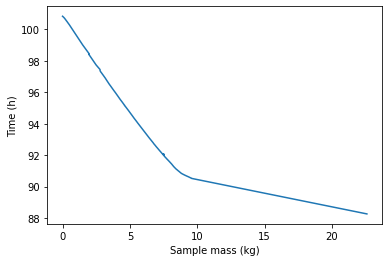

In [15]:
# the sample mass is plotted over time showing the drying rate
plt.plot(np.array(Delta_t1)/3600,dfs3['mass'])
plt.ylabel("Time (h)")
plt.xlabel("Sample mass (kg)")

In [16]:
# shrinkage is measured optically allowing and the data is recorded as "excel" file
# these data are imported into a dataframe
path = "C:\Arbeit\MikrowellenTr\Schwindung\\NEL 05 05 06 05.xlsx"
df = pd.read_excel(path,names=['T','X_l','X_m','X_r','X_T','Y_l1','Y_l2','Y_r1','Y_r2'])

Text(0, 0.5, 'Local shrinkage (%)')

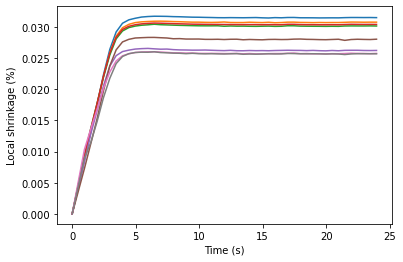

In [17]:
# the shrinkage data is plotted as follows illustrating how shrinkage is limited only to the early stages of drying
for i in range(1,len(df.columns)):
    plt.plot(df[df.columns[0]]/3600,(df[df.columns[i]][0]-df[df.columns[i]])/df[df.columns[i]][0])
plt.xlabel("Time (s)")
plt.ylabel("Local shrinkage (%)")